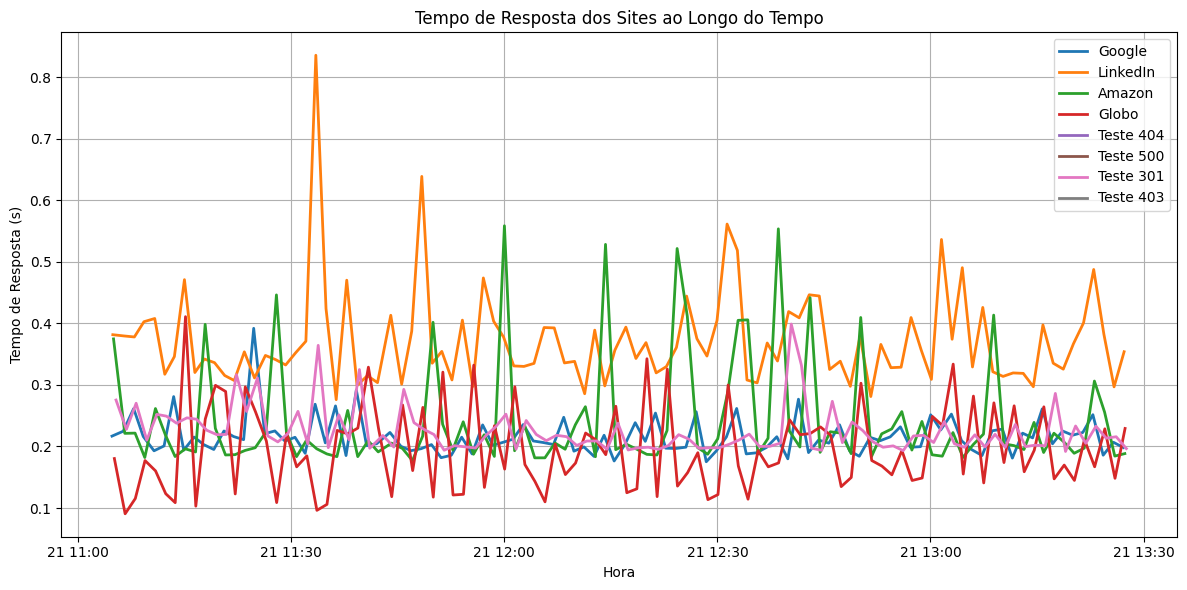

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- Ler dados históricos ---
arquivo = "monitor_sites.csv"
df = pd.read_csv(arquivo)

# Converter a coluna Hora para datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Criar coluna de disponibilidade
df['Disponivel'] = (df['Status'] == 200) & (df['Elemento_OK'] == True)


plt.figure(figsize=(12,6))
for site in df["Site"].unique():
    subset = df[df["Site"] == site]
    plt.plot(subset["Hora"], subset["Tempo"], label=site, linewidth=2)
plt.xlabel("Hora")
plt.ylabel("Tempo de Resposta (s)")
plt.title("Tempo de Resposta dos Sites ao Longo do Tempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


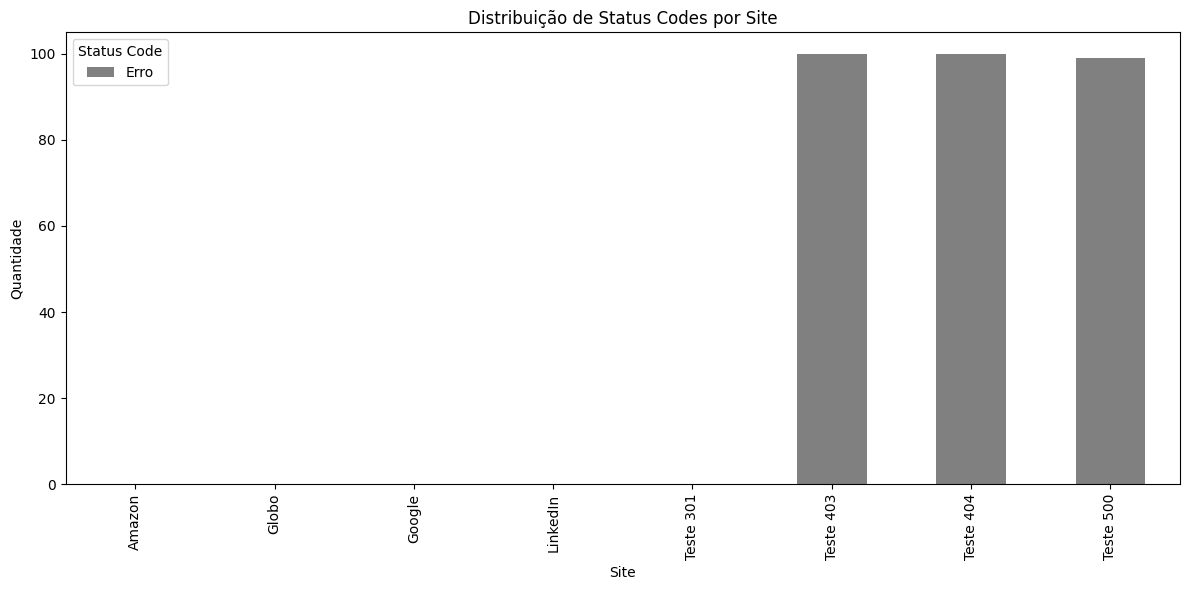

In [4]:

status_counts = df.groupby(["Site","Status"]).size().unstack(fill_value=0)

# Definindo cores manualmente para cada status code
# Supondo que seus status codes sejam 200, 404, 500, etc.
cores = {
    200: 'green',
    404: 'red',
    500: 'orange',
    301: 'blue',
    403: 'purple',
    'Erro': 'gray'
}

# Reordenar colunas de acordo com cores disponíveis
colunas = [col for col in status_counts.columns if col in cores]
status_counts[colunas].plot(kind="bar", stacked=True, figsize=(12,6),
                            color=[cores[col] for col in colunas])

plt.title("Distribuição de Status Codes por Site")
plt.xlabel("Site")
plt.ylabel("Quantidade")
plt.legend(title="Status Code")
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

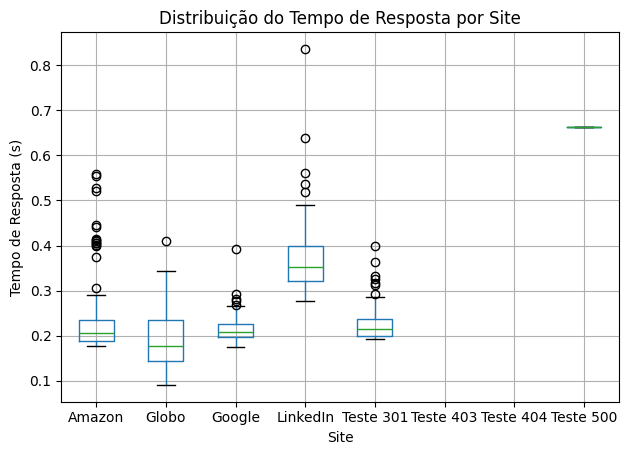

In [6]:

plt.figure(figsize=(12,6))
df.boxplot(column="Tempo", by="Site")
plt.title("Distribuição do Tempo de Resposta por Site")
plt.suptitle("")
plt.xlabel("Site")
plt.ylabel("Tempo de Resposta (s)")
plt.tight_layout()
plt.show()


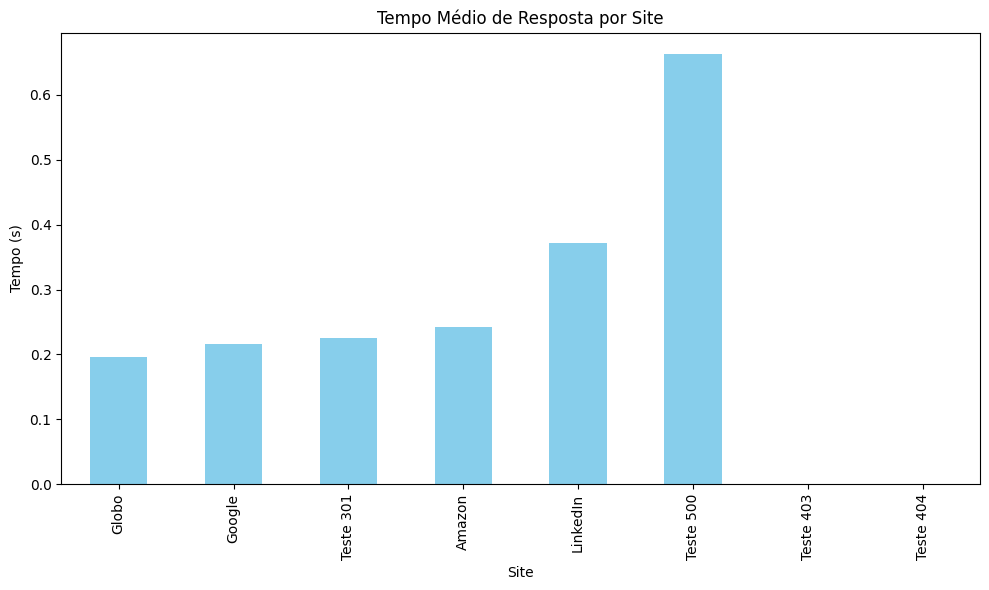

In [7]:
tempo_medio = df.groupby("Site")["Tempo"].mean().sort_values()
tempo_medio.plot(kind="bar", figsize=(10,6), color="skyblue")
plt.title("Tempo Médio de Resposta por Site")
plt.ylabel("Tempo (s)")
plt.xlabel("Site")
plt.tight_layout()
plt.show()


In [9]:
fig = go.Figure()
for site in df["Site"].unique():
    subset = df[df["Site"] == site]
    fig.add_trace(go.Scatter(
        x=subset["Hora"],
        y=subset["Tempo"],
        mode='lines+markers',
        name=site
    ))

fig.update_layout(
    title="Monitoramento de Sites (Interativo)",
    xaxis_title="Hora",
    yaxis_title="Tempo de Resposta (s)",
    template="plotly_white"
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed